(1) 멜론차트에서 장르별로 긁어오기
(2) 각 장르별로 스테디셀러 곡 번호 긁어오기
(3) 각 곡 번호에서 가사 추출하기
(4) 추출한 가사로 워드클라우드 만들어보기

In [1]:
#!pip3 install bs4

In [2]:
import requests
from bs4 import BeautifulSoup

In [6]:
# HTML 파일 열기
"""
Melon 같은 경우 header에 들어있는 정보를 확인해서 괜찮은 경우에만 실행된다고 함
http://www.useragentstring.com/ 에서 List of User Agent Strings 클릭한 다음
원하는 브라우저 찾아서 정보 입력해주기
User-Agnet를 밑에처럼 입력하면 크롬 브라우저라고 지정해줄 수 있음
"""

#headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36"}
headers = {"User-Agent" : "Mozilla/5.0 (X11; U; Linux x86_64; en-us) AppleWebKit/531.2+ (KHTML, like Gecko) Version/5.0 Safari/531.2+"}
URL = "https://www.melon.com/genre/song_list.htm" # 장르별로 모아둔 링크
r = requests.get(URL, headers = headers)
#r.text

HTTP 메소드에는 GET과 POST가 있음
GET: 서버로부터 정보를 조회하기 위해 설계된 메소드
POST: 리소스를 생성/변경하기 위해 설계된 메소드
GET에서는 www.example-url.com/resources?name1=value1&name2=value2 이런식으로 요청을 전송할 때 필요한 데이터를 쿼리스트링이라는 걸로 url 뒤에 붙여서 보내지만, POST는 HTTP 메세지의 Body에 담아서 전송(Body는 길이 제한 없음 --> 대용량 데이터를 전송할 수 있음)

GET: Idempotent --> 동일한 연산을 여러 번 수행하더라도 동일한 결과가 나타나야 함
즉 서버의 데이터나 상태를 변경시키지 않아야 하기 때문에 조회에 사용

POST: Non-idempotent --> 응답이 항상 다를 수 있음
따라서 서버의 상태나 데이터를 변경시킬 때 사용

In [7]:
# parsing: 어떤 페이지에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출해 가공하는 것
soup = BeautifulSoup(r.text, "html.parser")
print(soup)

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>장르음악&gt;한국대중음악&gt;발라드&gt;최신곡&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 실시간 차트부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="f13fc46b807bef984aa341efeb1adec8de12264c" name="naver-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/genre/song_list.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="width=device-width" name="viewport"/>
<link href="/favicon.ico?2" id

장르는 이런식으로 주소 처리 되어있음 -> 가장 뒷자리만 바꿔주면 됨
https://www.melon.com/genre/song_list.htm?gnrCode=GN0100
https://www.melon.com/genre/song_list.htm?gnrCode=GN0200
https://www.melon.com/genre/song_list.htm?gnrCode=GN0300
https://www.melon.com/genre/song_list.htm?gnrCode=GN0300&steadyYn=Y 이게 스테디셀러

" > ": 바로 아래에 속해 있다
" "(공백) : 아래에 속해있지만 바로 아래인지는 모른다
copy selector 써서 필요한 부분 찾아서 복사해 넣기

In [8]:
# 장르별 주소 긁어오기
table = soup.select("#conts > div.wrap_tabmenu01.type08 > ul > li")
print(table[0]) #<li class="first_child on"><a class="link_tab" href="/genre/song_list.htm?gnrCode=GN0100"><span class="cntt">발라드</span></a></li>
print(table[0].text) # text만 출력 --> "발라드" 출력
#table[0]["href"] # href 출력 --> 주소 뽑아올 수 있음
table = soup.select('#conts > div.wrap_tabmenu01.type08 > ul > li > a') # 한층 더 들어간거
link = []
for t in table:
    print(t['href'], t.text)
    link.append(["https://www.melon.com" + t['href'] + "&steadyYn=Y", t.text])

<li class="first_child on"><a class="link_tab" href="/genre/song_list.htm?gnrCode=GN0100"><span class="cntt">발라드</span></a></li>
발라드
/genre/song_list.htm?gnrCode=GN0100 발라드
/genre/song_list.htm?gnrCode=GN0200 댄스
/genre/song_list.htm?gnrCode=GN0300 랩/힙합
/genre/song_list.htm?gnrCode=GN0400 R&B;/Soul
/genre/song_list.htm?gnrCode=GN0500 인디음악
/genre/song_list.htm?gnrCode=GN0600 록/메탈
/genre/song_list.htm?gnrCode=GN0700 트로트
/genre/song_list.htm?gnrCode=GN0800 포크/블루스


In [9]:
link

[['https://www.melon.com/genre/song_list.htm?gnrCode=GN0100&steadyYn=Y',
  '발라드'],
 ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0200&steadyYn=Y', '댄스'],
 ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0300&steadyYn=Y',
  '랩/힙합'],
 ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0400&steadyYn=Y',
  'R&B;/Soul'],
 ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0500&steadyYn=Y',
  '인디음악'],
 ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0600&steadyYn=Y',
  '록/메탈'],
 ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0700&steadyYn=Y',
  '트로트'],
 ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0800&steadyYn=Y',
  '포크/블루스']]

In [10]:
import re

In [11]:
"""장르별로 곡 고유 번호 찾아주기"""
#print(link[0])

"""
    개발자모드에서는 tr:nth-child 라고 나오는데 이걸 지원하지 않음
    child를 -of-type으로 바꿔주면 돌아감
"""
# 일단 하나 실행시켜보기
r = requests.get(link[0][0], headers = headers)
soup = BeautifulSoup(r.text, "html.parser")
tmp = soup.select("#frm > div > table > tbody > tr:nth-of-type(1) > td:nth-of-type(4) > div > a")
print(tmp)
print(re.findall("\d+",tmp[0]["href"])) # href 주소에 있는 숫자가 곡 고유번호
    
result = []

for i in range(len(link)):
    r = requests.get(link[i][0], headers = headers)
    soup = BeautifulSoup(r.text, "html.parser")
    
    
    # tr - nth-child 뒤의 숫자가 등수 의미함
    #frm > div > table > tbody > tr:nth-child(1) > td:nth-child(4) > div > a
    
    tmp_result = [] # 여기다가 고유번호 하나씩 넣어주고 리스트에 합치기
    for j in range(1,51): # 스테디셀러에는 50개까지 한 화면에서 볼 수 있음
        try:
            source = "#frm > div > table > tbody > tr:nth-of-type(" + str(j) + ") > td:nth-of-type(4) > div > a"
            tmp = soup.select(source)[0]["href"]
            tmp_result.append(re.findall("\d+", tmp)[0])
        except:
            print("입력 값 초과")
            break
    result.append(tmp_result)

re.findall("\d+", tmp)
print(result)
print(len(result), len(result[0]))

[<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('4579468');" title="봄 사랑 벚꽃 말고 곡정보"><span class="none">곡정보</span></a>]
['4579468']
[['4579468', '4369827', '4646573', '1976860', '5445243', '5458267', '5445245', '5551472', '315872', '3403767', '4665108', '4475939', '4381724', '3973781', '315876', '111209', '3929471', '2523766', '1467722', '3436083', '623415', '2289924', '1560045', '4016085', '1590152', '4076051', '4002110', '1264830', '519620', '1631927', '2544949', '2358399', '61500', '83437', '3890826', '4544242', '1135163', '3758104', '3549031', '4665111', '3520616', '3143550', '5536206', '4645220', '1479633', '1144320', '485716', '4369859', '1114175', '5495296'], ['3053259', '3051244', '3625504', '1951556', '4562881', '3818489', '5546489', '4756304', '4764928', '5473905', '3795586', '62462', '1325050', '3837683', '5456521', '2212365', '1951557', '4193337', '2093360', '3929469', '4369832', '1756975', '4711007', '81013', '4163116', '5394265', '261

여기부터 한글 처리 모듈 쓰기

In [12]:
import konlpy
from konlpy.tag import *

In [13]:
okt = Okt() # 여러가지 있는데 그중에 일단 Okt라는 친구로 해보자

## 일단 하나만 가지고 해보기

In [14]:
"""
https://www.melon.com/song/detail.htm?songId=4579468
이렇게 주소로 들어가면 그 곡 정보 나옴
"""

r = requests.get('https://www.melon.com/song/detail.htm?songId=' + result[0][0], headers = headers)
soup = BeautifulSoup(r.text, "html.parser")
tmp = soup.select("#d_video_summary") # 가사 있는 부분
print(tmp[0])
#print(str(tmp[0]).split("<br/>"))
#'<div class="lyric" id="d_video_summary"><!-- height:auto; 로 변경시, 확장됨 -->\r\n\t\t\t\t\t\t\t

<div class="lyric" id="d_video_summary"><!-- height:auto; 로 변경시, 확장됨 -->
							길었던 겨우내 줄곧 품이 좀 남는<br/>밤색 코트<br/>그 속에 나를 쏙 감추고 걸음을<br/>재촉해 걸었어<br/>그런데 사람들 말이 너만 아직도<br/>왜 그러니<br/>그제서야 둘러보니 어느새 봄이<br/>손 잡고 걸을 사람 하나 없는 내게<br/>달콤한 봄바람이 너무해<br/>나만 빼고 다 사랑에 빠져<br/>봄노래를 부르고<br/>꽃잎이 피어나 눈 앞에 살랑거려도<br/>난 다른 얘기가 듣고 싶어<br/>한바탕 휩쓸고 지나가버릴<br/>오오 봄 사랑 벚꽃 말고<br/>봄 사랑 벚꽃 말고<br/>봄 사랑 벚꽃 말고<br/>봄 사랑 벚꽃 말고<br/>손에 닿지도 않을 말로<br/>날 꿈틀거리게 하지 말어<br/>맘 먹고 밖에 나가도<br/>막상 뭐 별 거 있나<br/>손 잡고 걸을 사람 하나 없는 내게<br/>오 사랑노래들이 너무해<br/>나만 빼고 다 사랑에 빠져<br/>봄노래를 부르고<br/>꽃잎이 피어나 눈 앞에 살랑거려도<br/>난 다른 얘기가 듣고 싶어<br/>한바탕 휩쓸고 지나가버릴<br/>오오 봄 사랑 벚꽃 말고<br/>남들보다 절실한 사랑 노래 가사를<br/>불러 봐<br/>수많은 연인들 가운데 왜 나는<br/>혼자만<br/>똑같은 거리와 어제와 같은 옷차림<br/>난 제자린데 왜 세상은 변한 것만<br/>같지<br/>누군가와 봄길을 거닐고 할 필욘<br/>없지만<br/>누구나 한번쯤은 머물고 싶은 그런<br/>기억을<br/>만들고 싶어 떨어지는 벚꽃잎도<br/>엔딩이 아닌 봄의 시작이듯<br/>사실은 요즘 옛날 생각이 나<br/>걷기만 해도 그리워지니까<br/>다시 느낄 수 있나 궁금해지지만<br/>Then you know what<br/>나만 빼고 다 사랑에 빠져<br/>봄노래를 부르고<br/>꽃잎이 피어나 눈 앞에 살랑거려도<br/>난 다른 얘기가 듣고 싶어<br/>한바탕 휩쓸고 지나가버릴<

In [15]:
tmp = str(tmp[0])

In [16]:
tmp[81:] # 앞에 '<div class="lyric" id="d_video_summary"><!-- height:auto; 로 변경시, 확장됨 -->\r\n\t\t\t\t\t\t\t 스플라이싱
tmp[81:].replace("<br/>"," ").replace("\n</div>","") # 띄어쓰기 처리

'길었던 겨우내 줄곧 품이 좀 남는 밤색 코트 그 속에 나를 쏙 감추고 걸음을 재촉해 걸었어 그런데 사람들 말이 너만 아직도 왜 그러니 그제서야 둘러보니 어느새 봄이 손 잡고 걸을 사람 하나 없는 내게 달콤한 봄바람이 너무해 나만 빼고 다 사랑에 빠져 봄노래를 부르고 꽃잎이 피어나 눈 앞에 살랑거려도 난 다른 얘기가 듣고 싶어 한바탕 휩쓸고 지나가버릴 오오 봄 사랑 벚꽃 말고 봄 사랑 벚꽃 말고 봄 사랑 벚꽃 말고 봄 사랑 벚꽃 말고 손에 닿지도 않을 말로 날 꿈틀거리게 하지 말어 맘 먹고 밖에 나가도 막상 뭐 별 거 있나 손 잡고 걸을 사람 하나 없는 내게 오 사랑노래들이 너무해 나만 빼고 다 사랑에 빠져 봄노래를 부르고 꽃잎이 피어나 눈 앞에 살랑거려도 난 다른 얘기가 듣고 싶어 한바탕 휩쓸고 지나가버릴 오오 봄 사랑 벚꽃 말고 남들보다 절실한 사랑 노래 가사를 불러 봐 수많은 연인들 가운데 왜 나는 혼자만 똑같은 거리와 어제와 같은 옷차림 난 제자린데 왜 세상은 변한 것만 같지 누군가와 봄길을 거닐고 할 필욘 없지만 누구나 한번쯤은 머물고 싶은 그런 기억을 만들고 싶어 떨어지는 벚꽃잎도 엔딩이 아닌 봄의 시작이듯 사실은 요즘 옛날 생각이 나 걷기만 해도 그리워지니까 다시 느낄 수 있나 궁금해지지만 Then you know what 나만 빼고 다 사랑에 빠져 봄노래를 부르고 꽃잎이 피어나 눈 앞에 살랑거려도 난 다른 얘기가 듣고 싶어 한바탕 휩쓸고 지나가버릴 오오 봄 사랑 벚꽃 말고 봄 사랑 벚꽃 말고 봄 사랑 벚꽃 말고 봄 사랑 벚꽃 말고 봄 사랑 벚꽃 말고 '

In [17]:
c = tmp[81:].replace("<br/>"," ").replace("\n</div>","")

In [18]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [19]:
import numpy as np
from PIL import Image

In [20]:
mask = np.array(Image.open("음표.jpeg")) # mask: WordCloud의 모양 설정해주기
data = c
wc = WordCloud(font_path = ".\korean_font.ttf", mask = mask,
               background_color = "white", max_words = 20000,
              max_font_size = 300).generate(data)
#wc.to_file("test.png")

In [21]:
%matplotlib inline

In [22]:
# plt.rcParams["font.family"] = 'sans-serif'
# 폰트를 한글로 바꿔주고 싶은데 방법을 모르겠어요ㅠㅠ 아시는분..?

In [23]:
import matplotlib.font_manager as fm # 한글 폰트 설정해주기 위한 import
path = '.\korean_font.ttf'
fontprop = fm.FontProperties(fname=path, size=100)

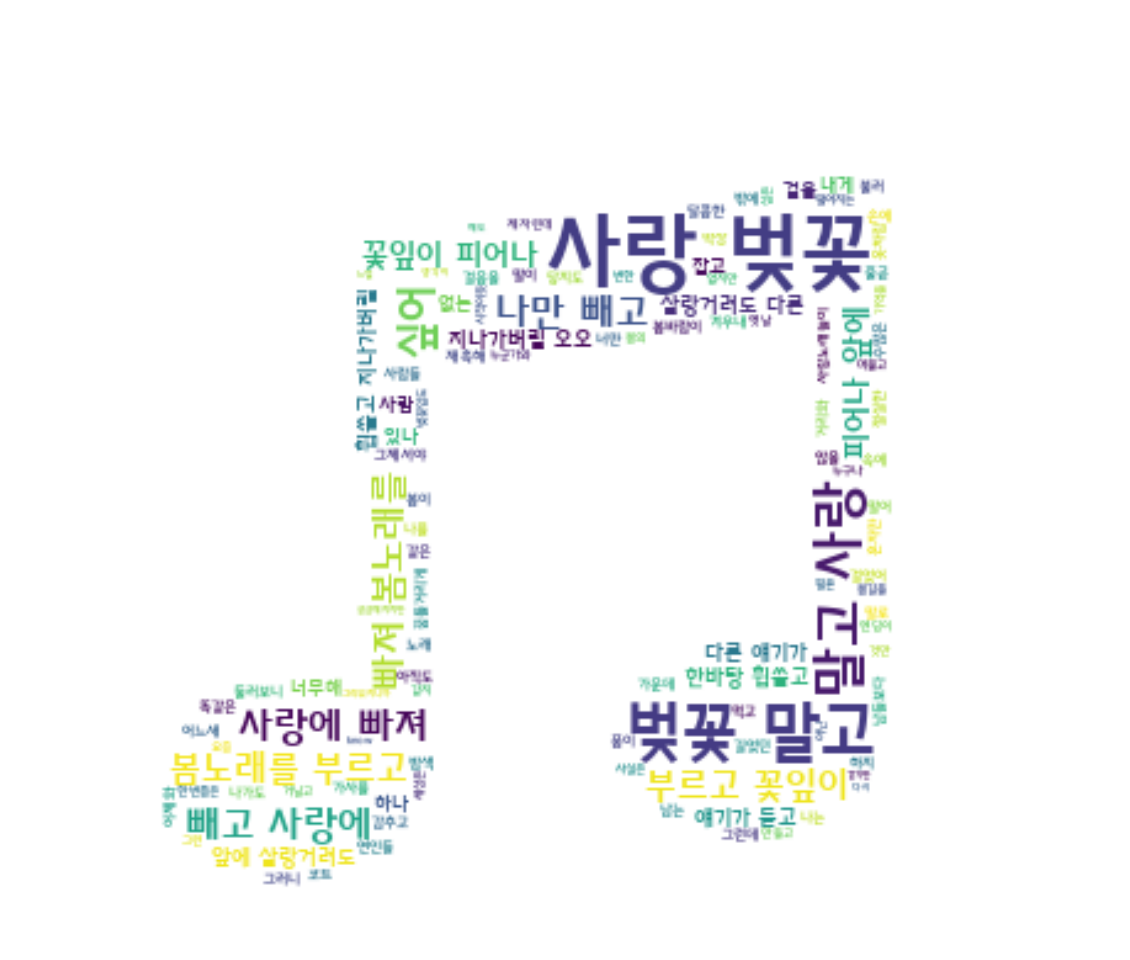

In [24]:
plt.figure(figsize = (20,20))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

plt.title("봄 사랑 벚꽃 말고", color = "white", fontproperties=fontprop)
plt.show()

## 다 합쳐서 해보기

In [25]:
print(link)
print(result[:2][:10])

[['https://www.melon.com/genre/song_list.htm?gnrCode=GN0100&steadyYn=Y', '발라드'], ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0200&steadyYn=Y', '댄스'], ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0300&steadyYn=Y', '랩/힙합'], ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0400&steadyYn=Y', 'R&B;/Soul'], ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0500&steadyYn=Y', '인디음악'], ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0600&steadyYn=Y', '록/메탈'], ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0700&steadyYn=Y', '트로트'], ['https://www.melon.com/genre/song_list.htm?gnrCode=GN0800&steadyYn=Y', '포크/블루스']]
[['4579468', '4369827', '4646573', '1976860', '5445243', '5458267', '5445245', '5551472', '315872', '3403767', '4665108', '4475939', '4381724', '3973781', '315876', '111209', '3929471', '2523766', '1467722', '3436083', '623415', '2289924', '1560045', '4016085', '1590152', '4076051', '4002110', '1264830', '519620', '1631927', '2544949', '2358399',

In [43]:
#frm > div > table > tbody > tr:nth-child(1) > td:nth-child(4) > div > a
#d_video_summary
print(result[0][0])
r = requests.get('https://www.melon.com/song/detail.htm?songId='+result[2][0], headers = headers)
soup = BeautifulSoup(r.text, "html.parser")
tmp = soup.select("#d_video_summary") # 가사 있는 부분
#print(soup)
#print(tmp[0])
print(len(tmp))
if len(tmp):
    print(10)

4579468
1
10


In [45]:
import time
import random

In [50]:
"""
link :[장르 주소, 장르 명] 들어있는 2차원 리스트
result: [각 장르별로 고유번호] 들어있는 2차원 리스트
"""
lyrics = [] # 가사 저장해줄 리스트

for i in range(len(result)):
    tmp_lyrics = ""
    for j in range(len(result[i])):
        r = requests.get('https://www.melon.com/song/detail.htm?songId=' + result[i][j], headers = headers)
        soup = BeautifulSoup(r.text, "html.parser")
        tmp = soup.select("#d_video_summary") # 가사 있는 부분
        if len(tmp): # 노래가 19금인 경우 가사를 볼 수가 없었음 --> 있는 경우에만 넣어주기
            tmp_lyrics += str(tmp[0])[81:].replace("<br/>"," ").replace("</div>","").replace("\n"," ")
        sleep = random.uniform(1,3)
        print(sleep)
        time.sleep(sleep)
        #print(i,j) #interrupt 단축키: ii 누르면 실행 강제 중지
        #print(i,j,tmp)
        
    print(len(tmp_lyrics))
    lyrics.append(tmp_lyrics)

2.7460371247528537
1.9096351713532578
1.889052840568774
2.825745951315408
2.7729341284166864
1.5948838631287134
1.911785573783616
1.4180774841274757
1.5972249516782029
2.277277225857961
2.060463904506282
2.77871440003434
2.409711283969048
2.5651007714243725
2.325643458606858
1.5241969791283718
2.4240078324532215
1.855583039619866
1.670879895254691
2.607353462609332
1.4159309487586829
2.8417262026960652
1.3772253911526426
1.8262595272607534
1.3194081293360722
2.0119996099648305
2.425928938695683
2.5282179087866314
2.5315065415284304
2.453888604196895
1.1465339632919145
2.6572904754032294
1.254242620577203
2.029970442834233
1.3099500281563472
2.6730484564878
1.010620912339621
2.422038548779047
2.8908988875866433
1.6495404033391925
2.498531202792675
1.2675940646239732
2.8831886929872765
2.5315801714119424
2.4541271875797266
1.6389638116422562
1.4729894661978011
1.549299660901306
1.8661524411605617
1.6250911480489183
26118
2.804595281652762
2.887910106958521
1.0457487467195978
1.7447794299

In [55]:
print(len(lyrics))
for i in lyrics:

    print(len(i))

8
26118
47487
52662
31146
26613
26615
18195
24891


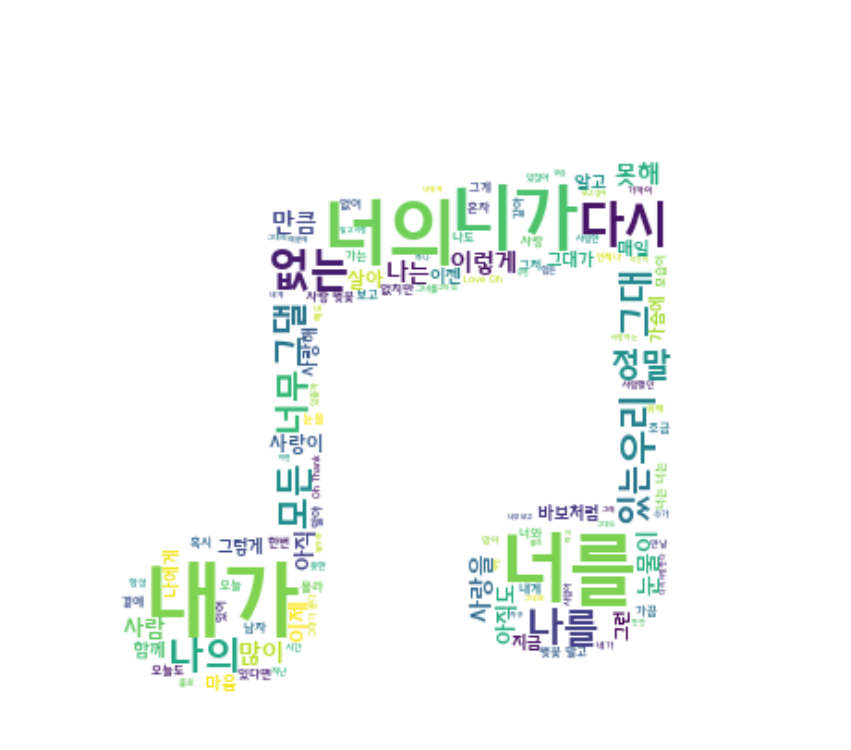

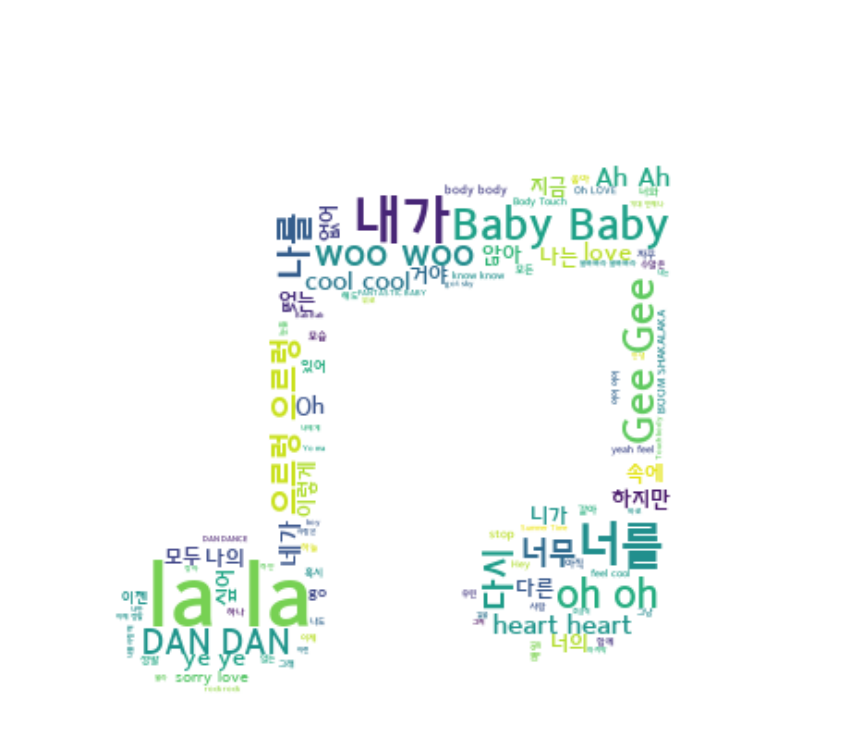

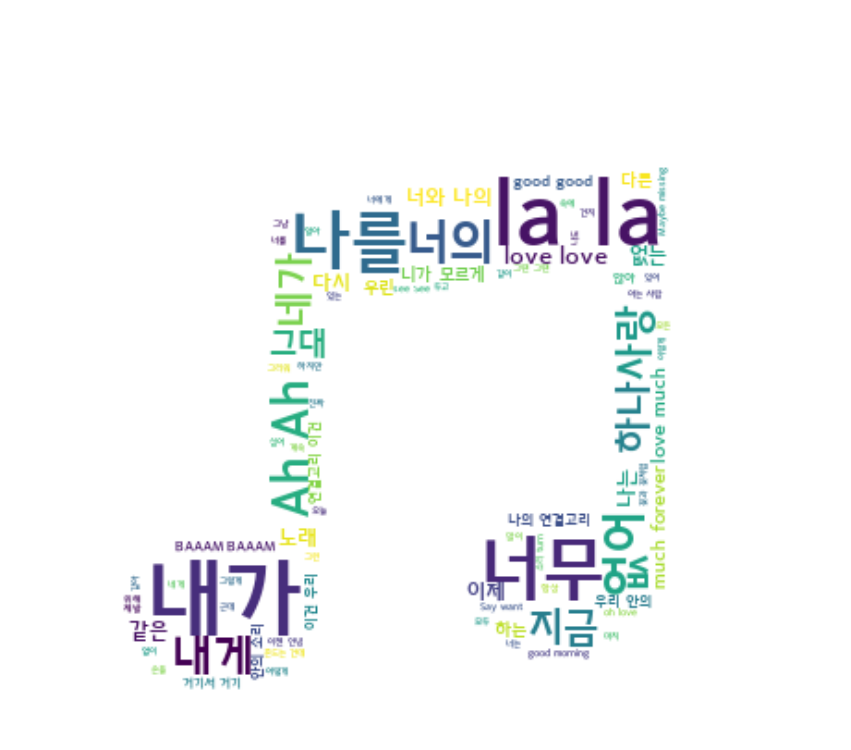

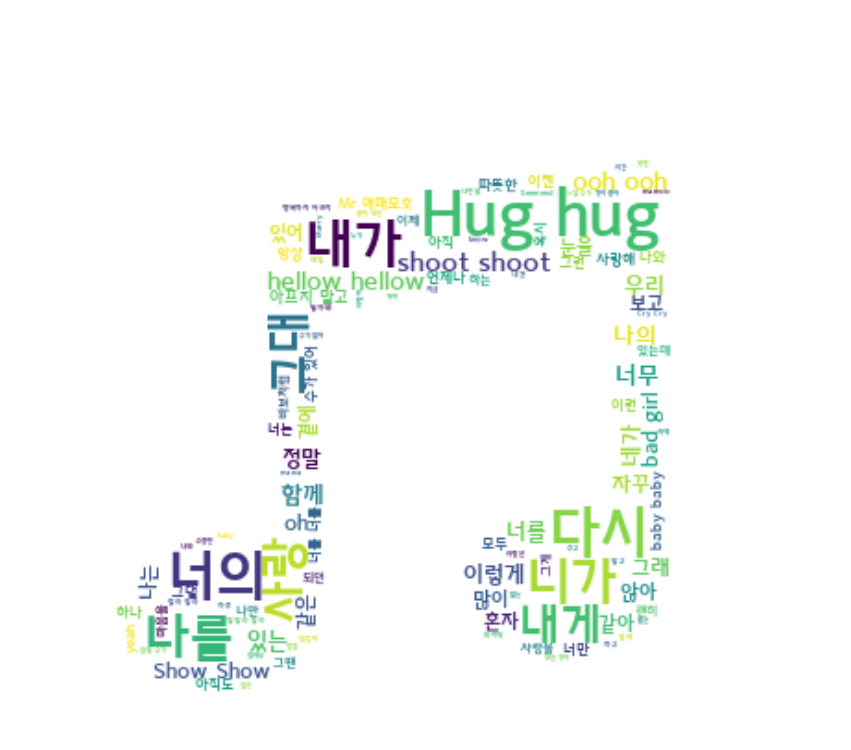

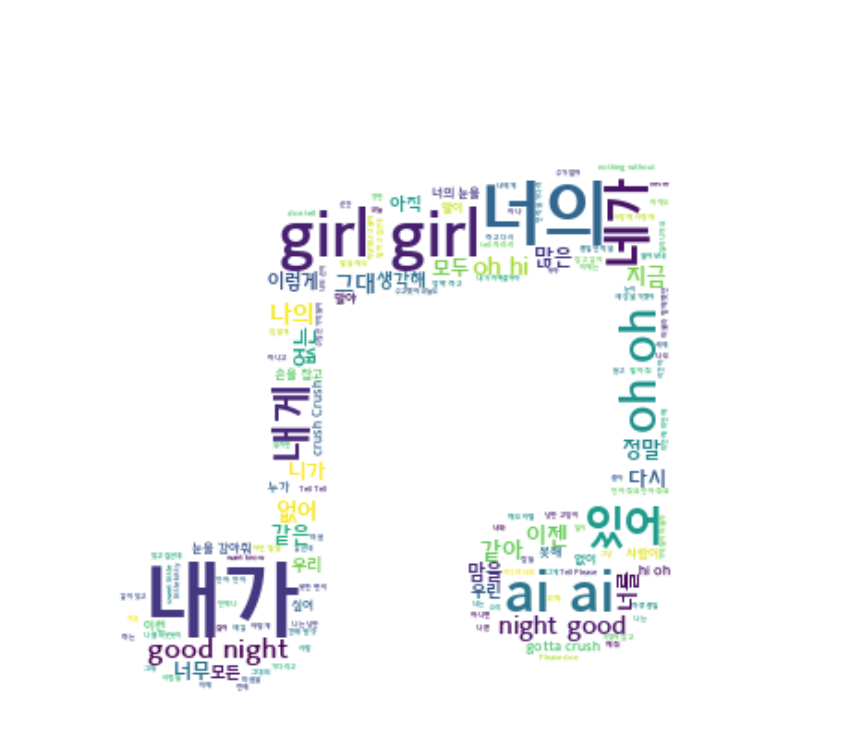

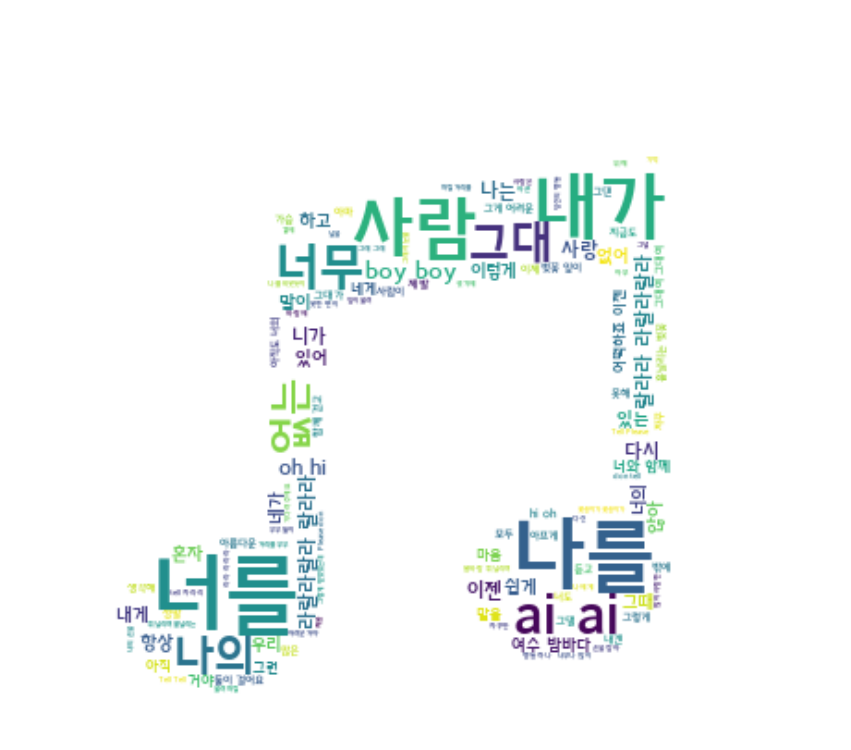

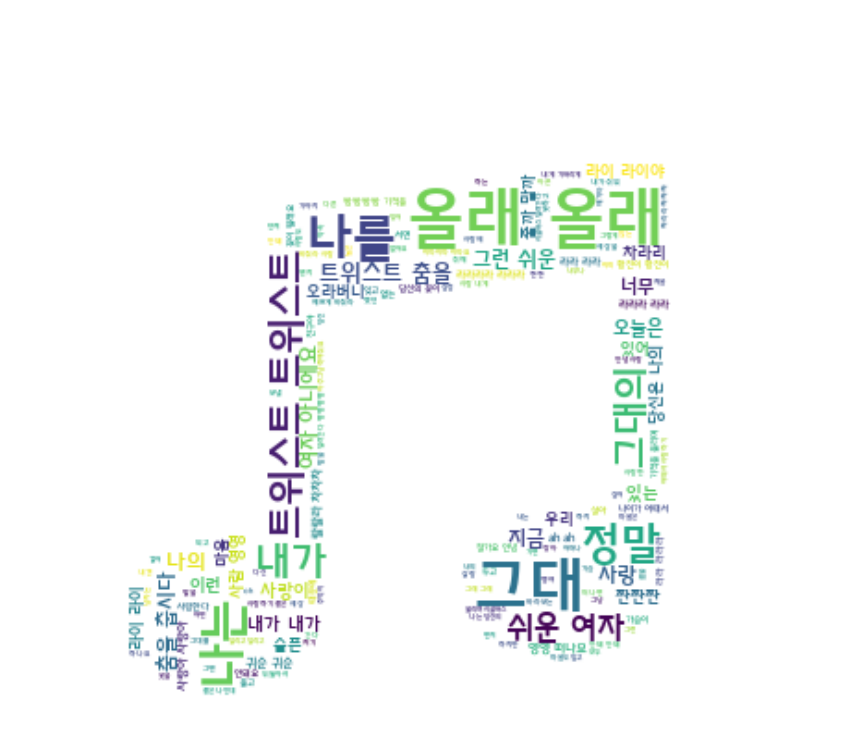

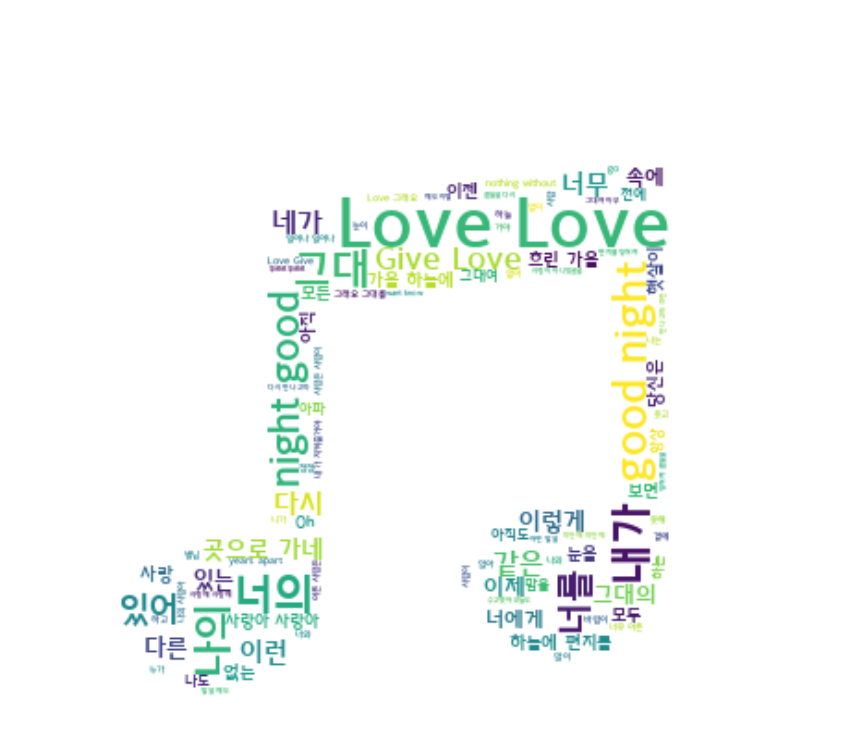

In [61]:
for i in range(len(lyrics)):
    data = lyrics[i]
    wc = WordCloud(font_path = ".\korean_font.ttf", mask = mask,
                   background_color = "white", max_words = 20000,
                  max_font_size = 300).generate(data)
    #wc.to_file("test.png")
    plt.figure(figsize = (15,15))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis("off")

    plt.title(link[i][1], color = "white", fontproperties=fontprop)
    plt.show()

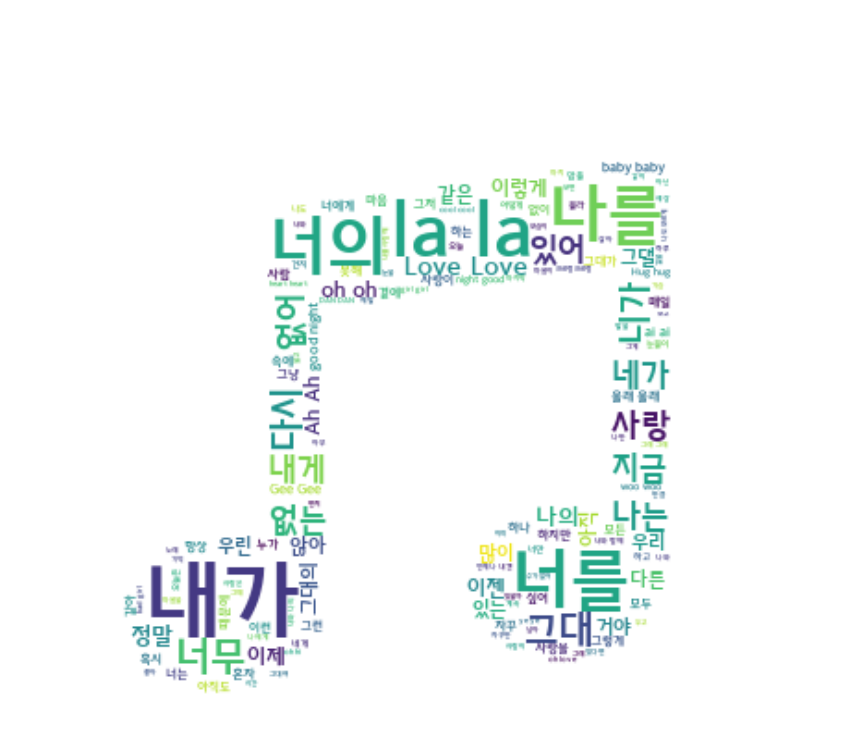

In [69]:
data = "".join(lyrics)
wc = WordCloud(font_path = ".\korean_font.ttf", mask = mask,
               background_color = "white", max_words = 20000,
              max_font_size = 300).generate(data)
#wc.to_file("test.png")
plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

plt.title("다 합친거", color = "white", fontproperties=fontprop)
plt.show()

In [64]:
print(len(data))

253727


In [65]:
wc = WordCloud(font_path = ".\korean_font.ttf", mask = mask,
               background_color = "white", max_words = 20000,
              max_font_size = 300).generate(lyrics[0])
wc.words_

{'내가': 1.0,
 '너를': 0.8307692307692308,
 '너의': 0.7384615384615385,
 '니가': 0.6923076923076923,
 '다시': 0.5076923076923077,
 '없는': 0.49230769230769234,
 '우리': 0.4307692307692308,
 '나를': 0.4153846153846154,
 '나의': 0.38461538461538464,
 '너무': 0.35384615384615387,
 '그대': 0.3384615384615385,
 '모든': 0.3230769230769231,
 '그댈': 0.3076923076923077,
 '있는': 0.27692307692307694,
 '정말': 0.27692307692307694,
 '이렇게': 0.24615384615384617,
 '나는': 0.23076923076923078,
 '눈물이': 0.23076923076923078,
 '사랑을': 0.23076923076923078,
 '못해': 0.2153846153846154,
 '많이': 0.2153846153846154,
 '만큼': 0.2,
 '아직도': 0.18461538461538463,
 '사람': 0.18461538461538463,
 '이제': 0.18461538461538463,
 '아직': 0.18461538461538463,
 '사랑이': 0.18461538461538463,
 '살아': 0.18461538461538463,
 '그대가': 0.18461538461538463,
 '그런': 0.16923076923076924,
 '함께': 0.16923076923076924,
 '지금': 0.16923076923076924,
 '바보처럼': 0.16923076923076924,
 '그렇게': 0.16923076923076924,
 '마음': 0.16923076923076924,
 '가슴에': 0.15384615384615385,
 '매일': 0.1538461538461538